In [1]:
#import libraries
#import numpy and pandas
import numpy as np
import pandas as pd
#import matplotlib
import matplotlib.pyplot as plt
#import pickle
import pickle
#use the plt inside the notebook
%matplotlib inline
#Image Normalization and Standardization
from sklearn import preprocessing
import tensorflow as tf
#PCA
from sklearn.decomposition import PCA


In [8]:
#directory and name constants for the image dataset
#directory and name constants for the images
img_dir = './dataset/image/'
img_name_front = 'IMAGE_'
img_name_code = np.arange(0,3000,1).astype(str)
img_name_back = '.jpg'
#directory and name constants for the label
label_dir = './dataset/'
label_name = 'label.csv'
#pkl file directory
pkl_dir = './dataset/'

pkl_name_xt = 'testX0.pkl'
pkl_name_x0 = 'trainX0.pkl'
pkl_name_x1 = 'trainX1.pkl'
pkl_name_x2 = 'trainX2.pkl'

pkl_name_yt = 'testY.pkl'
pkl_name_y = 'trainY.pkl'

<class 'numpy.ndarray'>
(512, 512, 3)


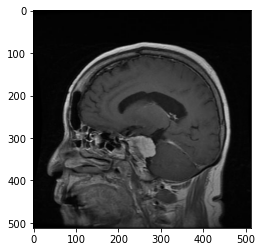

In [9]:
#understand data
img_number = 0
#img = plt.imread('./dataset/image/IMAGE_0000.jpg')
img_test = plt.imread(img_dir+img_name_front+img_name_code[img_number].rjust(4,'0')+img_name_back)
plt.imshow(img_test)
print(type(img_test))
print(img_test.shape)

In [11]:
#process data (store data into a array)
img_list = []
img_F_list = []
img_S_list = []
img_N_list = []

for i in range(3000):
    img_temp = plt.imread(img_dir+img_name_front+img_name_code[i].rjust(4,'0')+img_name_back)

    #flatten
    img_temp_0 = np.dot(img_temp,[0.299,0.587,0.114])
    img_temp_0 = img_temp_0.flatten()
    img_F_list.append(img_temp_0)

img_set_F = np.array(img_F_list)

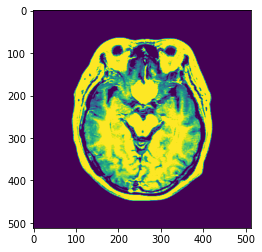

In [12]:
#review the data
plt.imshow(img_set_S[0].reshape(512,512))

In [13]:
train_X0 = pd.DataFrame(img_set_F.T)
train_X0.to_pickle(pkl_dir+pkl_name_x0)

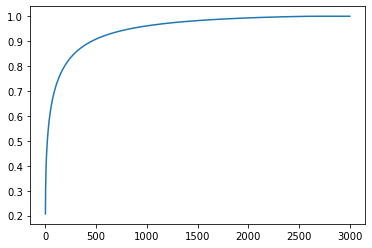

In [4]:
#PCA the data
#to find the best hyper-parameter
pca_line = PCA().fit(img_set_F)
plt.plot(np.cumsum(pca_line.explained_variance_ratio_))

In [5]:
ratio_pca = np.cumsum(pca_line.explained_variance_ratio_)
np.save('ratio_pca.npy',ratio_pca)

In [35]:
#Search for the best n
for index in range(3000):
    if ratio_pca[index] > 0.95:
        print(index)
        break

838


In [ ]:
#get pca value
#save pca image into train_X
pca0 = PCA(n_components = 838)
img_set_FP = pca0.fit_transform(img_set_F)
train_X0 = pd.DataFrame(img_set_FP.T)
train_X0.to_pickle(pkl_dir+pkl_name_x0)


In [4]:
#get pca value
#save pca image into train_X
pca1 = PCA(n_components = 838)
img_set_SP = pca1.fit_transform(img_set_S)
train_X1 = pd.DataFrame(img_set_SP.T)
train_X1.to_pickle(pkl_dir+pkl_name_x1)


In [4]:
#get pca value
#save pca image into train_X
pca2 = PCA(n_components = 838)
img_set_NP = pca2.fit_transform(img_set_N)
train_X2 = pd.DataFrame(img_set_NP.T)
train_X2.to_pickle(pkl_dir+pkl_name_x2)

In [10]:
#process label to ceate column [tumor type]
label_set = pd.read_csv(label_dir+label_name)
label_tumor = np.empty([200], dtype = 'U16')

label_label = label_set.label
for i in range(200):
    if label_label[i] == 'no_tumor':
        label_tumor[i] = 'no'
    elif label_label[i] == 'meningioma_tumor':
        label_tumor[i] = 'meningioma'
    elif label_label[i] == 'glioma_tumor':
        label_tumor[i] = 'glioma'
    elif label_label[i] == 'pituitary_tumor':
        label_tumor[i] = 'pituitary'
    else:
        label_tumor[i] = None

In [11]:
#save label into train_Y
train_Y = label_set.copy()
train_Y['tumor_type'] = pd.Series(label_tumor)
train_Y.to_pickle(pkl_dir+pkl_name_y) 